### Name: Ambica Srivastava
### SAP ID: 70472019232
### Roll Number: N076

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df= pd.read_csv('/content/Gmat_logistics_1.csv') #read the dataset

In [ ]:
#explore the dataset
df.head()

,gmat,admitted
0,780,1
1,750,1
2,690,1
3,710,1
4,680,1


In [ ]:
df.describe()

,gmat,admitted
count,40.000000,40.000000
mean,654.000000,0.525000
std,61.427464,0.505736
min,540.000000,0.000000
25%,607.500000,0.000000
50%,660.000000,1.000000
75%,690.000000,1.000000
max,780.000000,1.000000


In [ ]:
df.std()

gmat        61.427464
admitted     0.505736
dtype: float64

In [ ]:
df.value_counts()

gmat  admitted
690   1           5
660   1           4
580   0           3
680   1           3
650   0           3
550   0           2
590   0           2
710   1           2
610   0           2
620   0           2
640   0           1
570   0           1
600   0           1
780   1           1
770   1           1
670   0           1
      1           1
720   1           1
730   1           1
740   1           1
750   1           1
540   0           1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   gmat      40 non-null     int64
 1   admitted  40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


In [ ]:
df.dropna()

,gmat,admitted
0,780,1
1,750,1
2,690,1
3,710,1
4,680,1
5,730,1
6,690,1
7,720,1
8,740,1
9,690,1


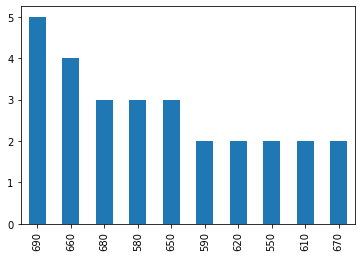

In [ ]:
df["gmat"].value_counts().head(10).plot(kind="bar")

In [ ]:
#to print the shape
df.shape

(40, 2)

In [ ]:
df.isnull().any()

gmat        False
admitted    False
dtype: bool

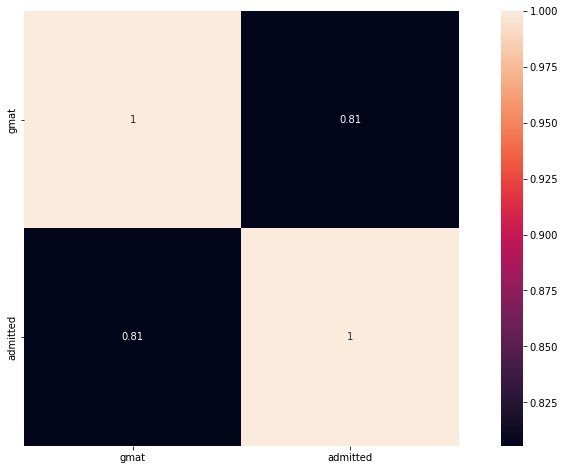

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=corr,square=True,annot=True,cbar=True)

In [ ]:
#to print the name of columns
df.columns

Index(['gmat', 'admitted'], dtype='object')

In [ ]:
#to define independent and dependent variable
x=df.drop(['admitted'],axis=1)
y=df['admitted']

In [ ]:
#to check whether x is a dataframe or not as it is independent variable
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#to check whether y is a series or not as it is dependent variable
print(type(y))

<class 'pandas.core.series.Series'>


In [ ]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
#performing logistic regression 
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#making prediction for the test data
y_prediction = model.predict(x_test)

In [ ]:
#to obtain the regression equation
b0= model.intercept_
b1= model.coef_
print("Equation of the regression line is y_est= {} + {}*x".format(b0,b1))

Equation of the regression line is y_est= [-92.73341129] + [[0.14110778]]*x


In [ ]:
#to evaluate the model using confusion matrix
ConfMatrix = confusion_matrix(y_test, y_prediction)
print(ConfMatrix)

[[2 0]
 [0 6]]


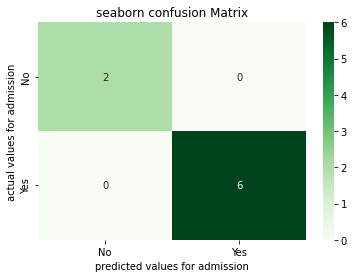

In [ ]:
ax = sns.heatmap(ConfMatrix, annot = True, cmap='Greens')
ax.set_title('seaborn confusion Matrix');
ax.set_xlabel('predicted values for admission')
ax.set_ylabel('actual values for admission');
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])
plt.show() 
#visualization of confusion matrix 

In [ ]:
#to check the accuracy of the model
acc = accuracy_score(y_test,y_prediction)
print("Accuracy of model:", acc)

Accuracy of model: 1.0


In [ ]:
#to check the accuracy from the confusion matrix
tp= ConfMatrix[1,1] #true positive
tn= ConfMatrix[0,0] #true negative
total = len(y_test)
print("Accuracy from confusion matrix: ", (tp+tn)/total)

Accuracy from confusion matrix:  1.0


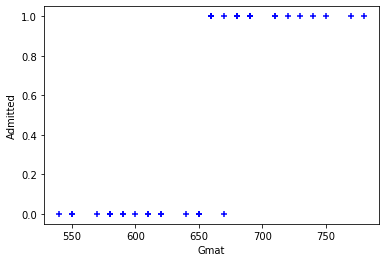

In [ ]:
#%matplotlib inline
plt.xlabel("Gmat")
plt.ylabel("Admitted")
plt.scatter(df.gmat,df.admitted, color="blue", marker="+")

In [ ]:
x_train = sm.add_constant(x_train)
logit_model = sm.Logit(y_train,x_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.135840
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   32
Model:                          Logit   Df Residuals:                       30
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Jan 2022   Pseudo R-squ.:                  0.8035
Time:                        14:44:56   Log-Likelihood:                -4.3469
converged:                       True   LL-Null:                       -22.118
Covariance Type:            nonrobust   LLR p-value:                 2.495e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -93.4930     59.930     -1.560      0.119    -210.953      23.967
gmat           0.1423      0

**Conclusion**

By generating a confusion matrix and calculating its accuracy, I learned how to create Logistic Regression in Python. I also learned how to make decisions based on highly linked independent variables, as well as how to design a regression model and use it to create predictions based on the data. As a result, after finishing this experiment, I feel confident in my ability to develop Logistic Regression in Python on my own.